### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

ANSWER:
* one-vs-all approach considers $n$ models where the $i$-th model is trained on a version of the dataset such that the $i$-th the class is assigned $1$ and the rest of the classes $0$. In other words, the $i$-th model is trained to classify $i$-th class or not $i$-th class. The final prediction is generally the result generated by the model with the highest confidence.
* one-vs-all approach consider $C_{n}^{2}$ models, where each model is trained to distinguish between different classes. The final prediction is the class with majority votes.

In [1]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context()

In [2]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)
print(X.shape)

(1500, 2)


In [3]:
data = pd.DataFrame(data=np.concatenate([X, y.reshape(-1, 1)], axis=1), columns=['x1', 'x2', 'y'])

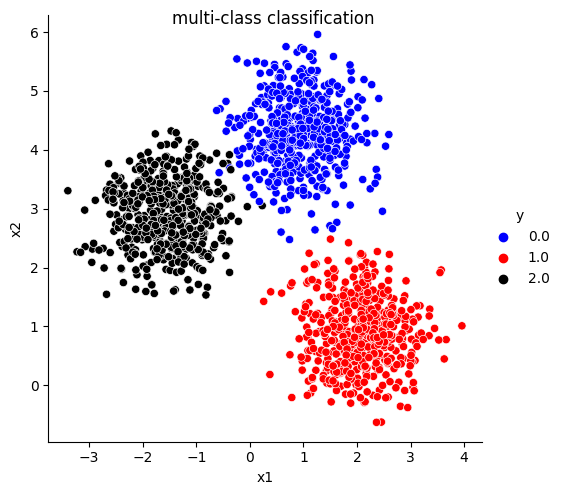

In [4]:
g = sns.relplot(kind='scatter', data=data, x='x1', y='x2', hue='y', palette=['blue', 'red', 'black'])
g.fig.suptitle("multi-class classification")
g.set(xlabel='x1', ylabel='x2')
plt.show()

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [5]:
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovo')
svc.fit(X, y)

SVC(decision_function_shape='ovo')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


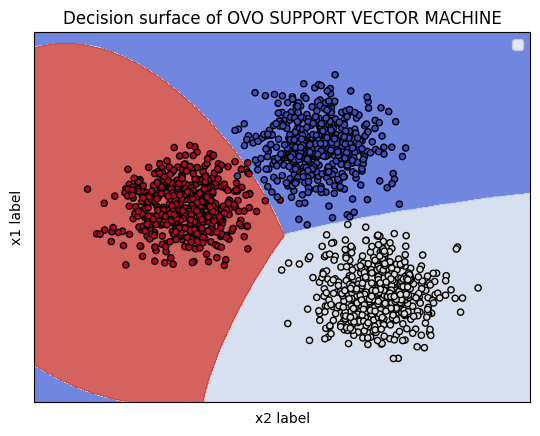

In [6]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.multiclass import OneVsOneClassifier

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of OVO SUPPORT VECTOR MACHINE')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, ovo, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x1 label')
ax.set_xlabel('x2 label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


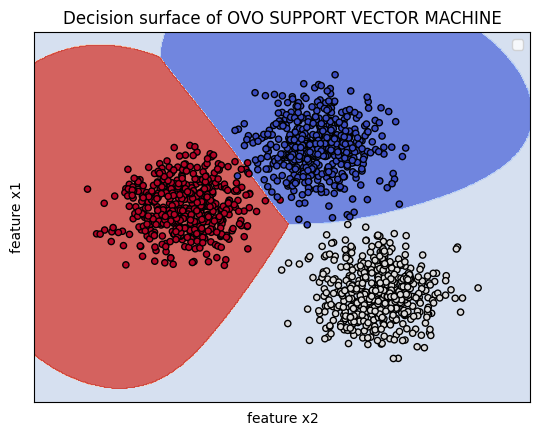

In [7]:
from sklearn.multiclass import OneVsRestClassifier
model = SVC()
# define ovo strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of OVO SUPPORT VECTOR MACHINE')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, ovr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('feature x1')
ax.set_xlabel('feature x2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Using 5-fold cross validation compare the accuracies of each method

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

ovo_score = np.mean(cross_val_score(ovo, X, y, scoring='accuracy', cv=CV))
ovr_score = np.mean(cross_val_score(ovr, X, y, scoring='accuracy', cv=CV))

print(f"One VS One, accuracy through 5 splits: {str(ovo_score)}")
print(f"One VS rest, accuracy through 5 splits: {str(ovr_score)}")

# both results achieved remarkably high results. Yet, One VS One out performed One vs rest slightly.

One VS One, accuracy through 5 splits: 0.9960000000000001
One VS rest, accuracy through 5 splits: 0.9953333333333333
